<a href="https://colab.research.google.com/github/Virum9520/Ecommerce-Customers-Regression/blob/main/Linear_Regression_on_Ecommerce_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression Project

##The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("Ecommerce Customers.csv")

In [ ]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

#Exploratory Data Analysis

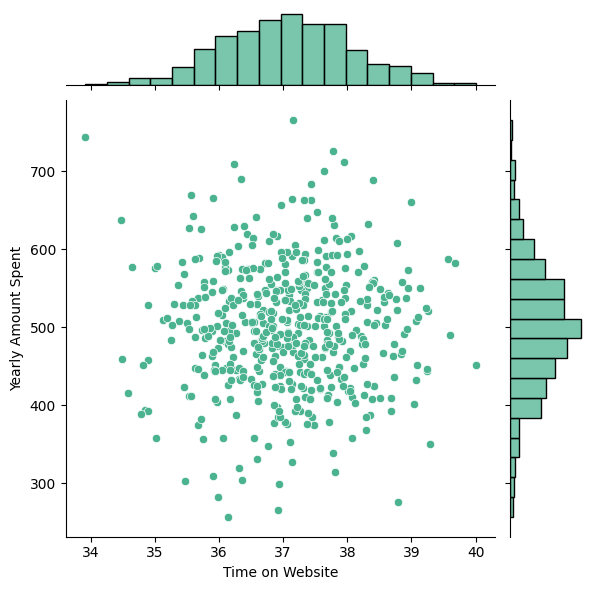

In [ ]:
sns.jointplot(data=df,x=df['Time on Website'],y=df['Yearly Amount Spent'],color="#4CB391")

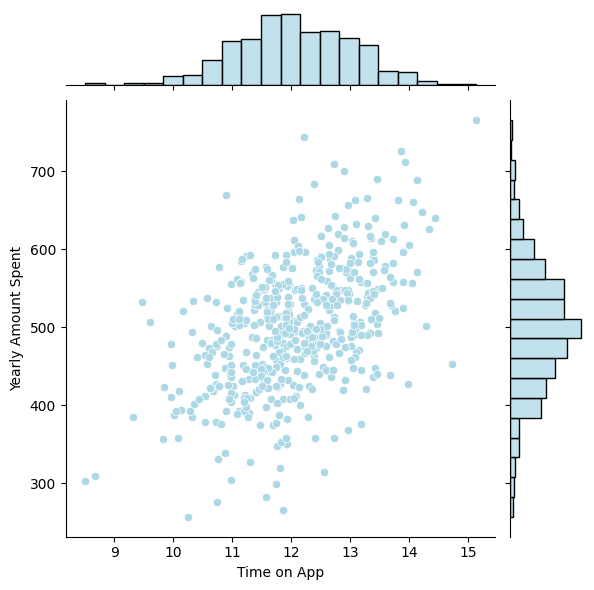

In [ ]:
sns.jointplot(data=df,x=df['Time on App'],y=df['Yearly Amount Spent'],color='lightblue')

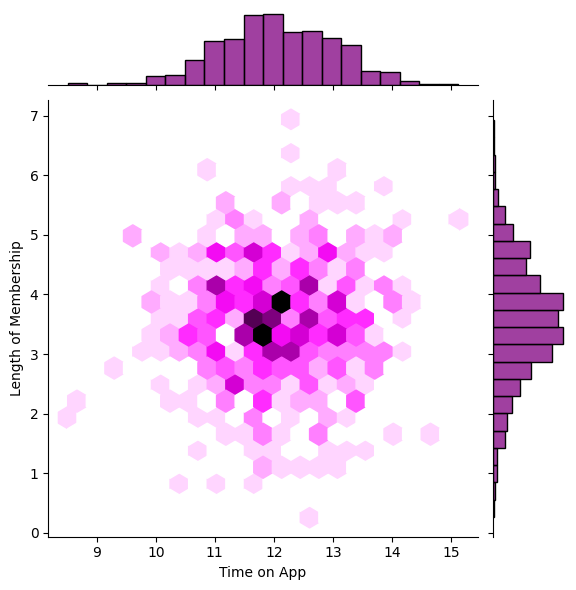

In [ ]:
sns.jointplot(data=df,x=df['Time on App'],y=df['Length of Membership'],kind='hex',color='purple')

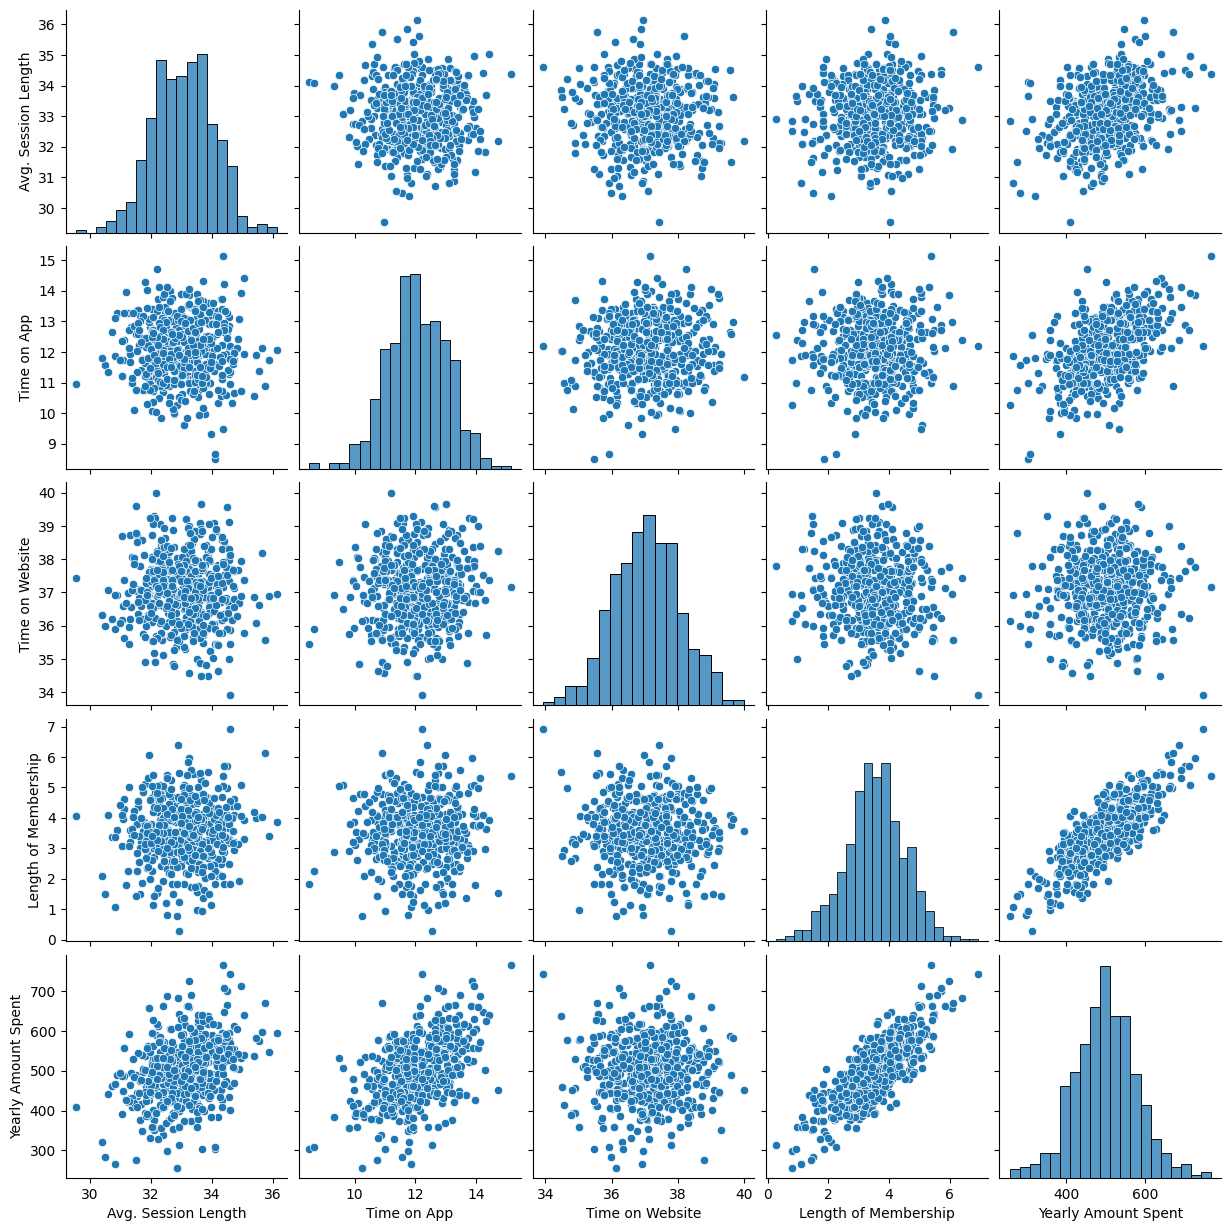

In [ ]:
sns.pairplot(df)

<function matplotlib.pyplot.show(close=None, block=None)>

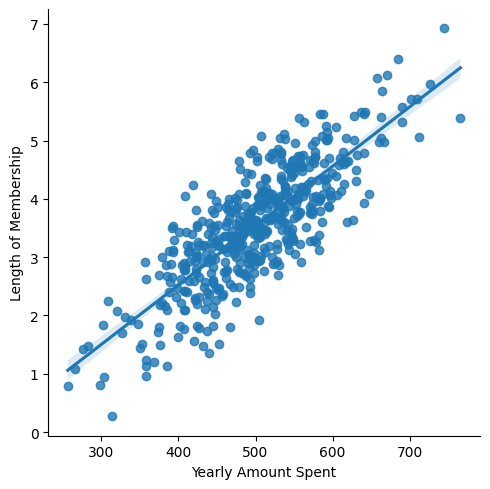

In [ ]:
sns.lmplot(data=df,x='Yearly Amount Spent',y='Length of Membership')
plt.show

#Training a Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=952)

In [ ]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
LR.coef_

array([25.92357982, 38.5395261 ,  0.83650221, 62.36687421])

Text(0, 0.5, 'Predicted Y')

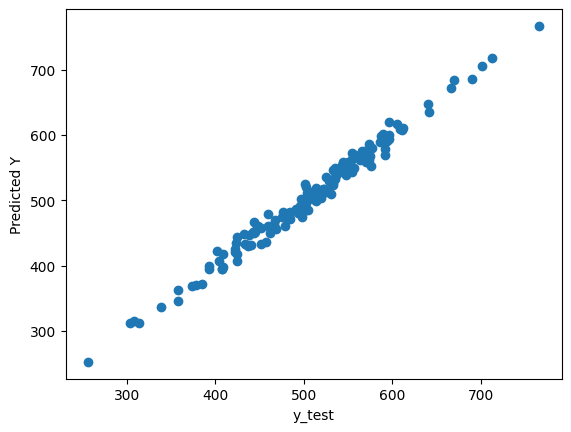

In [ ]:
predictions = LR.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('Predicted Y')

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 8.556305864338277
MSE: 106.90877678980233
RMSE: 10.339670052269673


#Residual Analysis

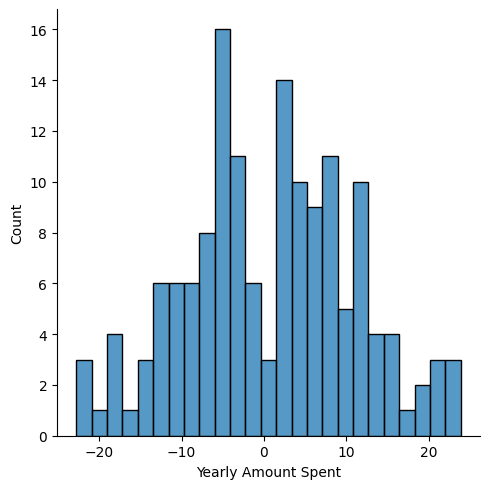

In [ ]:
sns.displot((y_test-predictions),bins=25)

In [ ]:
coeff_df = pd.DataFrame(data=LR.coef_,index=X.columns,columns=["Coefficient"])
coeff_df

,Coefficient
Avg. Session Length,25.923580
Time on App,38.539526
Time on Website,0.836502
Length of Membership,62.366874


##Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better.

##It depends on the company's approach and other factors whether they want to improve in websites performance(in terms of time) which is bad or they want to focus more towards their better aspect which is time on app.

##We should probably want to further explore the relationship between Length of Membership and the App or the Website too before coming to a conclusion!